<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - AVAX</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_AVAX.csv')
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,569385150.0
1822,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,532238762.0
1823,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,360787956.0
1824,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,320340266.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   AVAX-USD_ADJCLOSE  583 non-null    float64
 2   AVAX-USD_CLOSE     583 non-null    float64
 3   AVAX-USD_HIGH      583 non-null    float64
 4   AVAX-USD_LOW       583 non-null    float64
 5   AVAX-USD_OPEN      583 non-null    float64
 6   AVAX-USD_VOLUME    583 non-null    float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
AVAX-USD_ADJCLOSE,1243
AVAX-USD_CLOSE,1243
AVAX-USD_HIGH,1243
AVAX-USD_LOW,1243
AVAX-USD_OPEN,1243
AVAX-USD_VOLUME,1243


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AVAX-USD_ADJCLOSE,583.0,4.306912e+01,3.520897e+01,2.906161,1.182176e+01,3.189084e+01,7.417818e+01,1.345310e+02
AVAX-USD_CLOSE,583.0,4.306912e+01,3.520897e+01,2.906161,1.182176e+01,3.189084e+01,7.417818e+01,1.345310e+02
AVAX-USD_HIGH,583.0,4.550467e+01,3.691926e+01,2.939915,1.243437e+01,3.469755e+01,7.804176e+01,1.462179e+02
AVAX-USD_LOW,583.0,4.066852e+01,3.358998e+01,2.788822,1.111544e+01,2.999939e+01,7.174134e+01,1.261926e+02
AVAX-USD_OPEN,583.0,4.294390e+01,3.520388e+01,2.905293,1.179604e+01,3.179400e+01,7.414628e+01,1.348656e+02
AVAX-USD_VOLUME,583.0,6.225375e+08,6.693453e+08,3957.000000,7.044088e+07,3.689774e+08,1.009783e+09,3.379296e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
266,2018-01-17,NaN,NaN,NaN,NaN,NaN,NaN
1006,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN
220,2017-12-02,NaN,NaN,NaN,NaN,NaN,NaN
1583,2021-08-26,41.420753,41.420753,48.457481,41.420753,46.258255,1.202054e+09
521,2018-09-29,NaN,NaN,NaN,NaN,NaN,NaN
628,2019-01-14,NaN,NaN,NaN,NaN,NaN,NaN
1736,2022-01-26,65.995789,65.995789,72.919334,64.659729,67.893990,1.166402e+09
690,2019-03-17,NaN,NaN,NaN,NaN,NaN,NaN
1695,2021-12-16,98.401886,98.401886,109.770050,98.104958,101.209602,1.843664e+09
1750,2022-02-09,90.020866,90.020866,91.928459,84.781975,86.545013,1.053168e+09


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1240,2020-09-17,NaN,NaN,NaN,NaN,NaN,NaN
1241,2020-09-18,NaN,NaN,NaN,NaN,NaN,NaN
1242,2020-09-19,NaN,NaN,NaN,NaN,NaN,NaN
1243,2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2020-07-13,4.896294,4.896294,4.915115,4.481499,4.613968,28340.0
1,2020-07-14,4.986754,4.986754,5.229564,4.762068,4.909865,3957.0
2,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,288098840.0
3,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,173091214.0
4,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,96110964.0
...,...,...,...,...,...,...,...
578,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,569385150.0
579,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,532238762.0
580,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,360787956.0
581,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,320340266.0


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2020-07-13,4.896294,4.896294,4.915115,4.481499,4.613968,28340.0
1,2020-07-14,4.986754,4.986754,5.229564,4.762068,4.909865,3957.0
2,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,288098840.0
3,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,173091214.0
4,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,96110964.0
...,...,...,...,...,...,...,...
578,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,569385150.0
579,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,532238762.0
580,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,360787956.0
581,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,320340266.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2020-07-13,4.896294,4.896294,4.915115,4.481499,4.613968,28340.0,5.766121,9.675684
1,2020-07-14,4.986754,4.986754,5.229564,4.762068,4.909865,3957.0,1.541865,9.817088
2,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,288098840.0,4.735349,177.876043
3,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,173091214.0,29.214364,33.814708
4,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,96110964.0,16.393873,34.238123


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

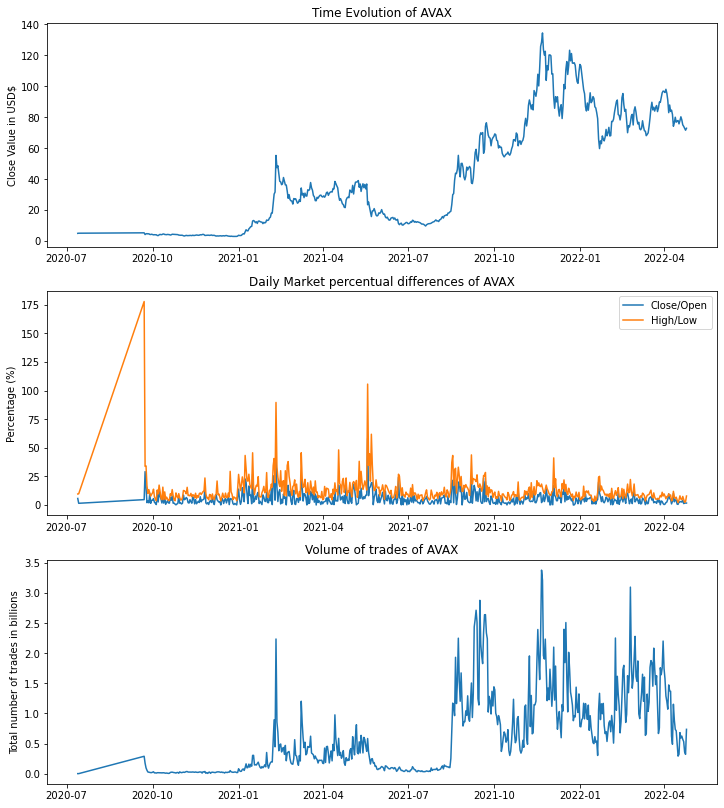

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-09-01']
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
346,2021-09-01,41.931602,41.931602,45.529957,38.628056,39.543476,1.042269e+09,5.695290,17.867587
347,2021-09-02,47.755917,47.755917,47.849262,41.296352,42.478481,9.674747e+08,11.050851,15.868011
348,2021-09-03,45.911182,45.911182,51.549908,44.889061,47.650715,1.292097e+09,3.788908,14.838463
349,2021-09-04,47.143166,47.143166,49.788338,44.165131,45.900158,9.207580e+08,2.636666,12.732232
350,2021-09-05,48.178925,48.178925,49.384651,45.589752,47.204662,8.703121e+08,2.022175,8.324018
...,...,...,...,...,...,...,...,...,...
578,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,5.693852e+08,4.245968,7.520329
579,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,5.322388e+08,1.297419,4.983337
580,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,3.607880e+08,1.655878,2.391089
581,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,3.203403e+08,1.801175,2.936528


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(15, df)
windowed_df['Date'] = df.iloc[15:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue_11daysBefore,closeValue_12daysBefore,closeValue_13daysBefore,closeValue_14daysBefore,closeValue_15daysBefore,closeValue,Date
0,57.625393,51.578117,53.110153,59.259430,57.164246,49.189137,40.772614,37.051407,37.598949,47.042988,48.178925,47.143166,45.911182,47.755917,41.931602,67.842697,2021-09-16
1,67.842697,57.625393,51.578117,53.110153,59.259430,57.164246,49.189137,40.772614,37.051407,37.598949,47.042988,48.178925,47.143166,45.911182,47.755917,69.934013,2021-09-17
2,69.934013,67.842697,57.625393,51.578117,53.110153,59.259430,57.164246,49.189137,40.772614,37.051407,37.598949,47.042988,48.178925,47.143166,45.911182,69.012383,2021-09-18
3,69.012383,69.934013,67.842697,57.625393,51.578117,53.110153,59.259430,57.164246,49.189137,40.772614,37.051407,37.598949,47.042988,48.178925,47.143166,70.075722,2021-09-19
4,70.075722,69.012383,69.934013,67.842697,57.625393,51.578117,53.110153,59.259430,57.164246,49.189137,40.772614,37.051407,37.598949,47.042988,48.178925,56.677929,2021-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,78.274330,80.285919,77.793678,75.709259,77.890266,77.437538,76.817856,80.001976,76.360062,74.172615,81.816467,84.594627,83.769226,87.919708,82.955910,75.080742,2022-04-21
218,75.080742,78.274330,80.285919,77.793678,75.709259,77.890266,77.437538,76.817856,80.001976,76.360062,74.172615,81.816467,84.594627,83.769226,87.919708,74.122963,2022-04-22
219,74.122963,75.080742,78.274330,80.285919,77.793678,75.709259,77.890266,77.437538,76.817856,80.001976,76.360062,74.172615,81.816467,84.594627,83.769226,72.920013,2022-04-23
220,72.920013,74.122963,75.080742,78.274330,80.285919,77.793678,75.709259,77.890266,77.437538,76.817856,80.001976,76.360062,74.172615,81.816467,84.594627,71.603035,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 15, 1), (222,))

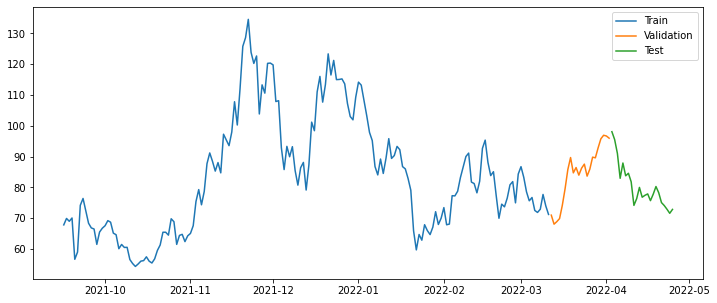

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [29]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((15, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [25]:
#BEST SOLUTION OF THE MODEL

# MSE=48.801
# Batch Size: 10
# Number of Epochs: 100
# Value of Learning Rate: 0.012

model = Sequential([layers.Input((15, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.012),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=10, verbose=2)

Epoch 1/100
18/18 - 2s - loss: 3281.2595 - mean_absolute_error: 51.7977 - val_loss: 478.8548 - val_mean_absolute_error: 19.9586 - 2s/epoch - 87ms/step
Epoch 2/100
18/18 - 0s - loss: 1005.4633 - mean_absolute_error: 26.3479 - val_loss: 151.5220 - val_mean_absolute_error: 9.5954 - 91ms/epoch - 5ms/step
Epoch 3/100
18/18 - 0s - loss: 615.8815 - mean_absolute_error: 21.4618 - val_loss: 119.8317 - val_mean_absolute_error: 8.3934 - 92ms/epoch - 5ms/step
Epoch 4/100
18/18 - 0s - loss: 675.4697 - mean_absolute_error: 22.1980 - val_loss: 156.0305 - val_mean_absolute_error: 9.7631 - 90ms/epoch - 5ms/step
Epoch 5/100
18/18 - 0s - loss: 679.5824 - mean_absolute_error: 22.3677 - val_loss: 141.0932 - val_mean_absolute_error: 9.2122 - 92ms/epoch - 5ms/step
Epoch 6/100
18/18 - 0s - loss: 680.5507 - mean_absolute_error: 22.3288 - val_loss: 167.4846 - val_mean_absolute_error: 10.1665 - 89ms/epoch - 5ms/step
Epoch 7/100
18/18 - 0s - loss: 750.0026 - mean_absolute_error: 23.3362 - val_loss: 164.3281 - val

Epoch 56/100
18/18 - 0s - loss: 453.0581 - mean_absolute_error: 17.6312 - val_loss: 119.3820 - val_mean_absolute_error: 8.2829 - 90ms/epoch - 5ms/step
Epoch 57/100
18/18 - 0s - loss: 417.5921 - mean_absolute_error: 16.9336 - val_loss: 134.7902 - val_mean_absolute_error: 8.9021 - 105ms/epoch - 6ms/step
Epoch 58/100
18/18 - 0s - loss: 430.2372 - mean_absolute_error: 17.0966 - val_loss: 128.9748 - val_mean_absolute_error: 8.5960 - 99ms/epoch - 6ms/step
Epoch 59/100
18/18 - 0s - loss: 409.4468 - mean_absolute_error: 16.4816 - val_loss: 142.4930 - val_mean_absolute_error: 9.1237 - 87ms/epoch - 5ms/step
Epoch 60/100
18/18 - 0s - loss: 426.4910 - mean_absolute_error: 16.8902 - val_loss: 129.3783 - val_mean_absolute_error: 8.6900 - 87ms/epoch - 5ms/step
Epoch 61/100
18/18 - 0s - loss: 400.3166 - mean_absolute_error: 16.3600 - val_loss: 135.0403 - val_mean_absolute_error: 8.6960 - 84ms/epoch - 5ms/step
Epoch 62/100
18/18 - 0s - loss: 408.7285 - mean_absolute_error: 16.5062 - val_loss: 135.9122 

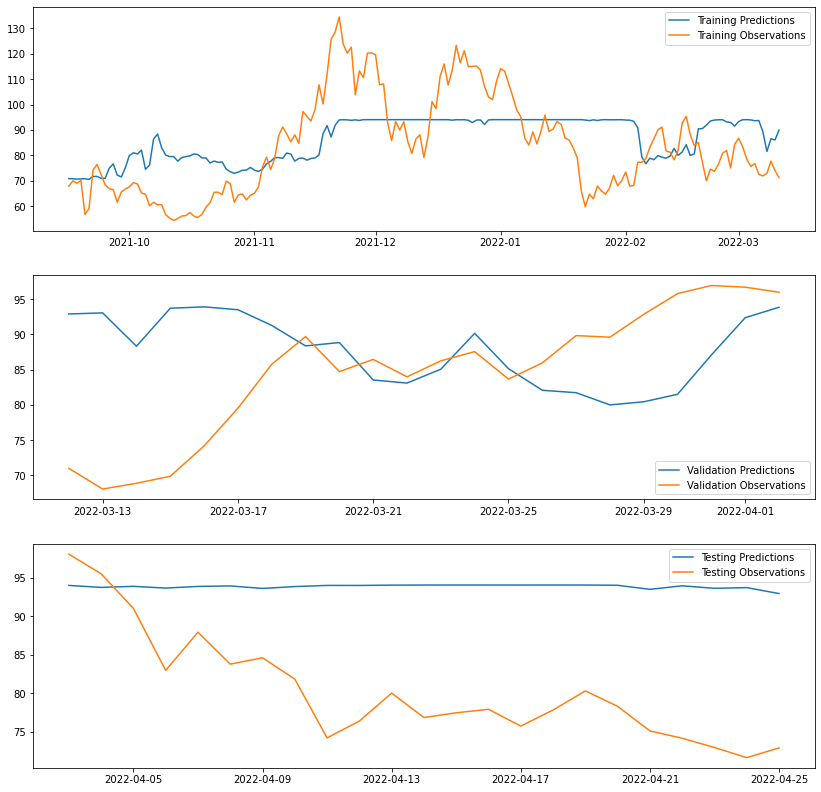

In [26]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

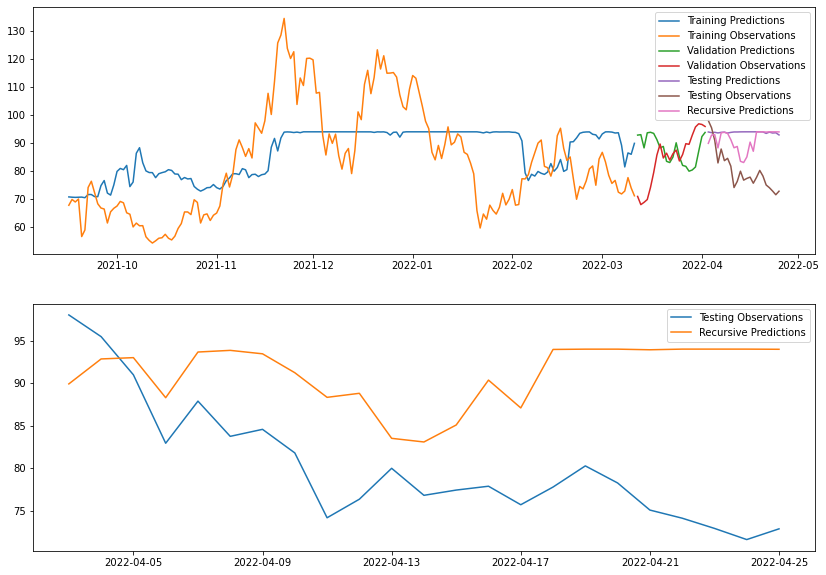

In [28]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
               'Training Observations',
               'Validation Predictions', 
               'Validation Observations',
               'Testing Predictions', 
               'Testing Observations',
               'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+ coin_name +'_recursivePredictions'+'.png')